In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.dates as mdates
from datetime import datetime

In [88]:

filepath = 'XAU_1Month_data_2004_to_2024-09-20.csv'
data = pd.read_csv(filepath)

In [89]:
print(data.head())

         Date   Time   Open   High    Low  Close  Volume
0  2004.06.01  00:00  384.0  404.6  381.1  393.3   24903
1  2004.07.01  00:00  391.6  408.6  384.5  390.5   34840
2  2004.08.01  00:00  390.3  413.8  388.1  409.3   40483
3  2004.09.01  00:00  409.6  418.6  394.3  417.8   47047
4  2004.10.01  00:00  417.8  430.2  409.1  428.1   25857


In [90]:
x = data['Date'].values
y = data['Close'].values

In [ ]:
#converting dates to a numerical value (ordinal) for the model
data['Date'] = pd.to_datetime(data['Date'])
data['Date_ordinal'] = data['Date'].apply(lambda date: date.toordinal())

# Update x with the new  date format
x = data['Date_ordinal'].values
y = data['Close'].values

In [92]:
#Create and fit the polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

In [93]:
#Generating prediction
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = poly_model.predict(x_fit[:, np.newaxis])

In [ ]:

#creating datetime objects with converted back from ordinal into more human readable format
x_fit_dates = [datetime.fromordinal(int(date)) for date in x_fit]

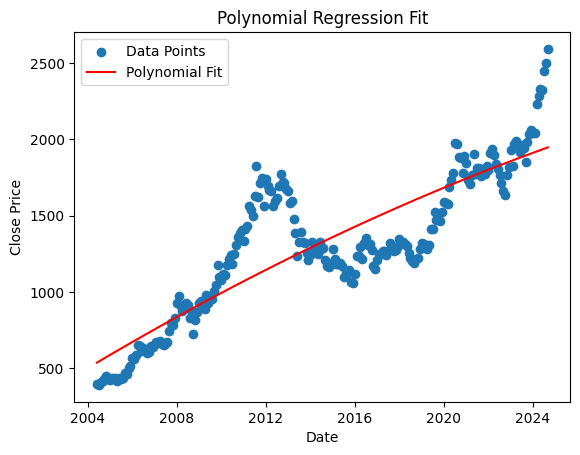

In [95]:
plt.scatter(data['Date'], y, label='Data Points')
plt.plot(x_fit_dates, y_fit, color='red', label='Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()